# Import the Required Libraries

In [74]:
# import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import statsmodels.api as sm
from xgboost import plot_importance
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from eli5.sklearn import PermutationImportance
import warnings # supress warnings
warnings.filterwarnings('ignore')

# Load the Dataset 

In [40]:
pd.set_option('display.max_columns', 100)
encoding_latin = 'latin'
data = pd.read_csv('D:/MSc-in-ML-&-Ai/Machine Learning 1/Model Selection/c2k_data_comma.csv', low_memory = False, encoding = encoding_latin)
data.head(10)

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dep_2_p,i1_dep_2_e,i1_dep_2_place,i1_rcf_2_p,i1_rcf_2_e,i1_rcf_2_place,i1_dep_3_p,i1_dep_3_e,i1_dep_3_place,i1_rcf_3_p,i1_rcf_3_e,i1_rcf_3_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_legid,i2_rcs_p,i2_rcs_e,i2_dep_1_p,i2_dep_1_e,i2_dep_1_place,i2_rcf_1_p,i2_rcf_1_e,i2_rcf_1_place,i2_dep_2_p,i2_dep_2_e,i2_dep_2_place,i2_rcf_2_p,i2_rcf_2_e,i2_rcf_2_place,i2_dep_3_p,i2_dep_3_e,i2_dep_3_place,i2_rcf_3_p,i2_rcf_3_e,i2_rcf_3_place,i2_dlv_p,i2_dlv_e,i2_hops,i3_legid,i3_rcs_p,i3_rcs_e,i3_dep_1_p,i3_dep_1_e,i3_dep_1_place,i3_rcf_1_p,i3_rcf_1_e,i3_rcf_1_place,i3_dep_2_p,i3_dep_2_e,i3_dep_2_place,i3_rcf_2_p,i3_rcf_2_e,i3_rcf_2_place,i3_dep_3_p,i3_dep_3_e,i3_dep_3_place,i3_rcf_3_p,i3_rcf_3_e,i3_rcf_3_place,i3_dlv_p,i3_dlv_e,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dep_2_p,o_dep_2_e,o_dep_2_place,o_rcf_2_p,o_rcf_2_e,o_rcf_2_place,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,?,?,?,?,?,?,?,?,?,?,?,?,840.0,1539.0,1.0,573,3315,2880,300,696,431,1965,515,256,?,?,?,?,?,?,?,?,?,?,?,?,2760,1280,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10121.0,9919.0,7559.0,240.0,2865.0,256.0,1330.0,1265.0,411.0,?,?,?,?,?,?,?,?,?,?,?,?,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,?,?,?,?,?,?,?,?,?,?,?,?,3780.0,5790.0,1.0,13946,2964,2888,180,239,257,970,756,149,160,331,149,1080,1142,431,?,?,?,?,?,?,7020,6628,2,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,626.0,3030.0,3016.0,300.0,286.0,431.0,835.0,526.0,256.0,?,?,?,?,?,?,?,?,?,?,?,?,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,?,?,?,?,?,?,?,?,?,?,?,?,3780.0,321.0,1.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,12691.0,1433.0,642.0,240.0,969.0,700.0,1200.0,1280.0,349.0,?,?,?,?,?,?,?,?,?,?,?,?,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,1340,1109,349,1240,820,671,?,?,?,?,?,?,335.0,535.0,2.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,12932.0,3963.0,3176.0,90.0,883.0,671.0,815.0,956.0,700.0,?,?,?,?,?,?,?,?,?,?,?,?,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,340,289,128,130,135,166,?,?,?,?,?,?,4230.0,1255.0,2.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,12805.0,152.0,179.0,180.0,131.0,166.0,230.0,167.0,128.0,810,872,128,740,346,411,?,?,?,?,?,?,4140.0,4797.0,2.0,1.0
5,5.0,9889.0,181.0,98.0,240.0,259.0,815.0,215.0,223.0,128.0,?,?,?,?,?,?,?,?,?,?,?,?,4890.0,115.0,1.0,9915,59,59,525,1934,128,3615,2270,128,?,?,?,?,?,?,?,?,?,?,?,?,3960,21025,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6430.0,136.0,29.0,240.0,308.0,128.0,960.0,682.0,597.0,?,?,?,?,?,?,?,?,?,?,?,?,3960.0,467.0,1.0,2.0
6,6.0,3997.0,1300.0,212.0,240.0,1267.0,815.0,270.0,135.0,391.0,?,?,?,?,?,?,?,?,?,?,?,?,5070.0,2161.0,1.0,9805,252,33,240,399,815,275,164,391,?,?,?,?,?,?,?,?,?,?,?,?,5070,727,1,571,250,153,150,181,610,525,181,281,415,764,281,80,108,391,?,?,?,?,?,?,2880,1258,2,2544.0,329.0,81.0,570.0,763.0,391.0,80.0,79.0,281.0,?,?,?,?,?,?,?,?,?,?,?,?,2880.0,151.0,1.0,3.0
7,7.0,7125.0,139.0,87.0,240.0,232.0,783.0,255.0,154.0,815.0,460,563,815,215,182,128,?,?,?,?,?,?,4890.0,374.0,2.0,10590,303,110,240,371,815,215,143,128,?,?,?,?,?,?,?,?,?,?,?,?,4890,919,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6753.0,119.0,19.0,240.0,298.0,128.0,960.0,678.0,597.0,?,?,?,?,?,?,?,?,?,?,?,?,3960.0,161.0,1.0,2.0
8,8.0,10481.0,387.0,68.0,240.0,514.0,815.0,285.0,219.0,485.0,?,?,?,?,?,?,?,?,?,?,?,?,5160.0,1170.0,1.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,5570.0,933.0,1074.0,180.0,677.0,485.0,885.0,695.0,149.0,?,?,?,?,?,?,?,?,?,?,?,?,6680.0,

In [41]:
descriptions = open("D:/MSc-in-ML-&-Ai/Machine Learning 1/Model Selection/c2k_data_comma_descriptions.txt", "r")
print(descriptions.read())

Attribute Information:

nr - unique id for process instance of overall process - domain: [1Ã¢â‚¬Â¦3942]

i1_legid - unique id across all transport legs (note: also to 'empty' legs are assigned an id) of incoming transport leg 1 - domain: [1..14664]
i1_rcs_p - planned duration (minutes) of incoming transport leg 1 (RCS: Freight Check in) - domain: [LONGINT]
i1_rcs_e - effective (i.e., actual) duration (minutes) of incoming transport leg 1 (RCS: Freight Check in) - domain: [LONGINT]
i1_dep_1_p - planned duration (minutes) of incoming transport leg 1 (DEP: Departure Segment 1) - domain: [LONGINT]
i1_dep_1_e - effective (i.e., actual) duration (minutes) of incoming transport leg 1 (DEP: Departure Segment 1) - domain: [LONGINT]
i1_dep_1_place - unique id for airport (original IATA codes have been masked due to confidentiality reasons) of incoming transport leg 1 (DEP: Departure Segment 1) - domain: [100Ã¢â‚¬Â¦816]
i1_rcf_1_p - planned duration (minutes) of incoming transport leg 1 (RCF: Arr

# Feature Engineering

In [42]:
data.shape

(3943, 98)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 98 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nr              3942 non-null   float64
 1   i1_legid        3942 non-null   float64
 2   i1_rcs_p        3942 non-null   float64
 3   i1_rcs_e        3942 non-null   float64
 4   i1_dep_1_p      3942 non-null   float64
 5   i1_dep_1_e      3942 non-null   float64
 6   i1_dep_1_place  3942 non-null   float64
 7   i1_rcf_1_p      3942 non-null   float64
 8   i1_rcf_1_e      3942 non-null   float64
 9   i1_rcf_1_place  3942 non-null   float64
 10  i1_dep_2_p      3942 non-null   object 
 11  i1_dep_2_e      3942 non-null   object 
 12  i1_dep_2_place  3942 non-null   object 
 13  i1_rcf_2_p      3942 non-null   object 
 14  i1_rcf_2_e      3942 non-null   object 
 15  i1_rcf_2_place  3942 non-null   object 
 16  i1_dep_3_p      3942 non-null   object 
 17  i1_dep_3_e      3942 non-null   o

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
nr,3942.0,1971.342973,1138.331044,0.0,986.25,1971.5,2956.75,3942.0
i1_legid,3942.0,7304.492136,4246.072270,1.0,3591.25,7429.5,10922.25,14661.0
i1_rcs_p,3942.0,2203.533486,4683.333105,5.0,377.75,1085.0,1946.50,47190.0
i1_rcs_e,3942.0,1653.323440,4553.855588,1.0,113.00,340.0,1375.00,46357.0
i1_dep_1_p,3942.0,205.891933,140.283173,75.0,120.00,180.0,240.00,2876.0
i1_dep_1_e,3942.0,711.408929,684.789184,4.0,263.00,516.0,949.75,9513.0
i1_dep_1_place,3942.0,503.703957,232.776578,101.0,308.00,485.0,700.00,815.0
i1_rcf_1_p,3942.0,796.002790,439.991579,50.0,455.00,820.0,1020.00,5001.0
i1_rcf_1_e,3942.0,666.358447,764.145906,13.0,274.00,657.5,883.00,38116.0
i1_rcf_1_place,3942.0,466.677829,237.373952,101.0,281.00,485.0,700.00,815.0


In [45]:
# Get the missings percentage from each columns

missings = pd.DataFrame(round(100*(data.isnull().sum()/len(data)), 2))
pd.set_option('display.max_rows', data.shape[0]+1)
missings

,0
nr,0.03
i1_legid,0.03
i1_rcs_p,0.03
i1_rcs_e,0.03
i1_dep_1_p,0.03
i1_dep_1_e,0.03
i1_dep_1_place,0.03
i1_rcf_1_p,0.03
i1_rcf_1_e,0.03
i1_rcf_1_place,0.03


In [46]:
# Check whether the null values are present or not

nan_values = pd.DataFrame(data.isnull().any())
pd.set_option('display.max_rows', data.shape[0]+1)
nan_values

,0
nr,True
i1_legid,True
i1_rcs_p,True
i1_rcs_e,True
i1_dep_1_p,True
i1_dep_1_e,True
i1_dep_1_place,True
i1_rcf_1_p,True
i1_rcf_1_e,True
i1_rcf_1_place,True


In [47]:
data.head(10)

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dep_2_p,i1_dep_2_e,i1_dep_2_place,i1_rcf_2_p,i1_rcf_2_e,i1_rcf_2_place,i1_dep_3_p,i1_dep_3_e,i1_dep_3_place,i1_rcf_3_p,i1_rcf_3_e,i1_rcf_3_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_legid,i2_rcs_p,i2_rcs_e,i2_dep_1_p,i2_dep_1_e,i2_dep_1_place,i2_rcf_1_p,i2_rcf_1_e,i2_rcf_1_place,i2_dep_2_p,i2_dep_2_e,i2_dep_2_place,i2_rcf_2_p,i2_rcf_2_e,i2_rcf_2_place,i2_dep_3_p,i2_dep_3_e,i2_dep_3_place,i2_rcf_3_p,i2_rcf_3_e,i2_rcf_3_place,i2_dlv_p,i2_dlv_e,i2_hops,i3_legid,i3_rcs_p,i3_rcs_e,i3_dep_1_p,i3_dep_1_e,i3_dep_1_place,i3_rcf_1_p,i3_rcf_1_e,i3_rcf_1_place,i3_dep_2_p,i3_dep_2_e,i3_dep_2_place,i3_rcf_2_p,i3_rcf_2_e,i3_rcf_2_place,i3_dep_3_p,i3_dep_3_e,i3_dep_3_place,i3_rcf_3_p,i3_rcf_3_e,i3_rcf_3_place,i3_dlv_p,i3_dlv_e,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dep_2_p,o_dep_2_e,o_dep_2_place,o_rcf_2_p,o_rcf_2_e,o_rcf_2_place,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,?,?,?,?,?,?,?,?,?,?,?,?,840.0,1539.0,1.0,573,3315,2880,300,696,431,1965,515,256,?,?,?,?,?,?,?,?,?,?,?,?,2760,1280,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,10121.0,9919.0,7559.0,240.0,2865.0,256.0,1330.0,1265.0,411.0,?,?,?,?,?,?,?,?,?,?,?,?,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,?,?,?,?,?,?,?,?,?,?,?,?,3780.0,5790.0,1.0,13946,2964,2888,180,239,257,970,756,149,160,331,149,1080,1142,431,?,?,?,?,?,?,7020,6628,2,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,626.0,3030.0,3016.0,300.0,286.0,431.0,835.0,526.0,256.0,?,?,?,?,?,?,?,?,?,?,?,?,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,?,?,?,?,?,?,?,?,?,?,?,?,3780.0,321.0,1.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,12691.0,1433.0,642.0,240.0,969.0,700.0,1200.0,1280.0,349.0,?,?,?,?,?,?,?,?,?,?,?,?,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,1340,1109,349,1240,820,671,?,?,?,?,?,?,335.0,535.0,2.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,12932.0,3963.0,3176.0,90.0,883.0,671.0,815.0,956.0,700.0,?,?,?,?,?,?,?,?,?,?,?,?,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,340,289,128,130,135,166,?,?,?,?,?,?,4230.0,1255.0,2.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,12805.0,152.0,179.0,180.0,131.0,166.0,230.0,167.0,128.0,810,872,128,740,346,411,?,?,?,?,?,?,4140.0,4797.0,2.0,1.0
5,5.0,9889.0,181.0,98.0,240.0,259.0,815.0,215.0,223.0,128.0,?,?,?,?,?,?,?,?,?,?,?,?,4890.0,115.0,1.0,9915,59,59,525,1934,128,3615,2270,128,?,?,?,?,?,?,?,?,?,?,?,?,3960,21025,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6430.0,136.0,29.0,240.0,308.0,128.0,960.0,682.0,597.0,?,?,?,?,?,?,?,?,?,?,?,?,3960.0,467.0,1.0,2.0
6,6.0,3997.0,1300.0,212.0,240.0,1267.0,815.0,270.0,135.0,391.0,?,?,?,?,?,?,?,?,?,?,?,?,5070.0,2161.0,1.0,9805,252,33,240,399,815,275,164,391,?,?,?,?,?,?,?,?,?,?,?,?,5070,727,1,571,250,153,150,181,610,525,181,281,415,764,281,80,108,391,?,?,?,?,?,?,2880,1258,2,2544.0,329.0,81.0,570.0,763.0,391.0,80.0,79.0,281.0,?,?,?,?,?,?,?,?,?,?,?,?,2880.0,151.0,1.0,3.0
7,7.0,7125.0,139.0,87.0,240.0,232.0,783.0,255.0,154.0,815.0,460,563,815,215,182,128,?,?,?,?,?,?,4890.0,374.0,2.0,10590,303,110,240,371,815,215,143,128,?,?,?,?,?,?,?,?,?,?,?,?,4890,919,1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,6753.0,119.0,19.0,240.0,298.0,128.0,960.0,678.0,597.0,?,?,?,?,?,?,?,?,?,?,?,?,3960.0,161.0,1.0,2.0
8,8.0,10481.0,387.0,68.0,240.0,514.0,815.0,285.0,219.0,485.0,?,?,?,?,?,?,?,?,?,?,?,?,5160.0,1170.0,1.0,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,5570.0,933.0,1074.0,180.0,677.0,485.0,885.0,695.0,149.0,?,?,?,?,?,?,?,?,?,?,?,?,6680.0,

In [48]:
data.replace("?", np.nan, inplace = True)
data.head(10)  

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dep_2_p,i1_dep_2_e,i1_dep_2_place,i1_rcf_2_p,i1_rcf_2_e,i1_rcf_2_place,i1_dep_3_p,i1_dep_3_e,i1_dep_3_place,i1_rcf_3_p,i1_rcf_3_e,i1_rcf_3_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_legid,i2_rcs_p,i2_rcs_e,i2_dep_1_p,i2_dep_1_e,i2_dep_1_place,i2_rcf_1_p,i2_rcf_1_e,i2_rcf_1_place,i2_dep_2_p,i2_dep_2_e,i2_dep_2_place,i2_rcf_2_p,i2_rcf_2_e,i2_rcf_2_place,i2_dep_3_p,i2_dep_3_e,i2_dep_3_place,i2_rcf_3_p,i2_rcf_3_e,i2_rcf_3_place,i2_dlv_p,i2_dlv_e,i2_hops,i3_legid,i3_rcs_p,i3_rcs_e,i3_dep_1_p,i3_dep_1_e,i3_dep_1_place,i3_rcf_1_p,i3_rcf_1_e,i3_rcf_1_place,i3_dep_2_p,i3_dep_2_e,i3_dep_2_place,i3_rcf_2_p,i3_rcf_2_e,i3_rcf_2_place,i3_dep_3_p,i3_dep_3_e,i3_dep_3_place,i3_rcf_3_p,i3_rcf_3_e,i3_rcf_3_place,i3_dlv_p,i3_dlv_e,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dep_2_p,o_dep_2_e,o_dep_2_place,o_rcf_2_p,o_rcf_2_e,o_rcf_2_place,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840.0,1539.0,1.0,573,3315,2880,300,696,431,1965,515,256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2760,1280,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10121.0,9919.0,7559.0,240.0,2865.0,256.0,1330.0,1265.0,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,5790.0,1.0,13946,2964,2888,180,239,257,970,756,149,160,331,149,1080,1142,431,NaN,NaN,NaN,NaN,NaN,NaN,7020,6628,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,626.0,3030.0,3016.0,300.0,286.0,431.0,835.0,526.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,321.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12691.0,1433.0,642.0,240.0,969.0,700.0,1200.0,1280.0,349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,1340,1109,349,1240,820,671,NaN,NaN,NaN,NaN,NaN,NaN,335.0,535.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12932.0,3963.0,3176.0,90.0,883.0,671.0,815.0,956.0,700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,340,289,128,130,135,166,NaN,NaN,NaN,NaN,NaN,NaN,4230.0,1255.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12805.0,152.0,179.0,180.0,131.0,166.0,230.0,167.0,128.0,810,872,128,740,346,411,NaN,NaN,NaN,NaN,NaN,NaN,4140.0,4797.0,2.0,1.0
5,5.0,9889.0,181.0,98.0,240.0,259.0,815.0,215.0,223.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4890.0,115.0,1.0,9915,59,59,525,1934,128,3615,2270,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3960,21025,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6430.0,136.0,29.0,240.0,308.0,128.0,960.0,682.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3960.0,467.0,1.0,2.0
6,6.0,3997.0,1300.0,212.0,240.0,1267.0,815.0,270.0,135.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5070.0,2161.0,1.0,9805,252,33,240,399,815,275,164,391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5070,727,1,571,250

In [49]:
data.isnull().any()

nr                True
i1_legid          True
i1_rcs_p          True
i1_rcs_e          True
i1_dep_1_p        True
i1_dep_1_e        True
i1_dep_1_place    True
i1_rcf_1_p        True
i1_rcf_1_e        True
i1_rcf_1_place    True
i1_dep_2_p        True
i1_dep_2_e        True
i1_dep_2_place    True
i1_rcf_2_p        True
i1_rcf_2_e        True
i1_rcf_2_place    True
i1_dep_3_p        True
i1_dep_3_e        True
i1_dep_3_place    True
i1_rcf_3_p        True
i1_rcf_3_e        True
i1_rcf_3_place    True
i1_dlv_p          True
i1_dlv_e          True
i1_hops           True
i2_legid          True
i2_rcs_p          True
i2_rcs_e          True
i2_dep_1_p        True
i2_dep_1_e        True
i2_dep_1_place    True
i2_rcf_1_p        True
i2_rcf_1_e        True
i2_rcf_1_place    True
i2_dep_2_p        True
i2_dep_2_e        True
i2_dep_2_place    True
i2_rcf_2_p        True
i2_rcf_2_e        True
i2_rcf_2_place    True
i2_dep_3_p        True
i2_dep_3_e        True
i2_dep_3_place    True
i2_rcf_3_p 

In [50]:
# Fill the NaN values with mean

data.replace('NaN', np.nan, inplace=True)
data.fillna(0, inplace=True)
data.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dep_2_p,i1_dep_2_e,i1_dep_2_place,i1_rcf_2_p,i1_rcf_2_e,i1_rcf_2_place,i1_dep_3_p,i1_dep_3_e,i1_dep_3_place,i1_rcf_3_p,i1_rcf_3_e,i1_rcf_3_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_legid,i2_rcs_p,i2_rcs_e,i2_dep_1_p,i2_dep_1_e,i2_dep_1_place,i2_rcf_1_p,i2_rcf_1_e,i2_rcf_1_place,i2_dep_2_p,i2_dep_2_e,i2_dep_2_place,i2_rcf_2_p,i2_rcf_2_e,i2_rcf_2_place,i2_dep_3_p,i2_dep_3_e,i2_dep_3_place,i2_rcf_3_p,i2_rcf_3_e,i2_rcf_3_place,i2_dlv_p,i2_dlv_e,i2_hops,i3_legid,i3_rcs_p,i3_rcs_e,i3_dep_1_p,i3_dep_1_e,i3_dep_1_place,i3_rcf_1_p,i3_rcf_1_e,i3_rcf_1_place,i3_dep_2_p,i3_dep_2_e,i3_dep_2_place,i3_rcf_2_p,i3_rcf_2_e,i3_rcf_2_place,i3_dep_3_p,i3_dep_3_e,i3_dep_3_place,i3_rcf_3_p,i3_rcf_3_e,i3_rcf_3_place,i3_dlv_p,i3_dlv_e,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dep_2_p,o_dep_2_e,o_dep_2_place,o_rcf_2_p,o_rcf_2_e,o_rcf_2_place,o_dep_3_p,o_dep_3_e,o_dep_3_place,o_rcf_3_p,o_rcf_3_e,o_rcf_3_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,0,0,0,0,0,0,0,0,0,0,0,0,840.0,1539.0,1.0,573,3315,2880,300,696,431,1965,515,256,0,0,0,0,0,0,0,0,0,0,0,0,2760,1280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10121.0,9919.0,7559.0,240.0,2865.0,256.0,1330.0,1265.0,411.0,0,0,0,0,0,0,0,0,0,0,0,0,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,0,0,0,0,0,0,0,0,0,0,0,0,3780.0,5790.0,1.0,13946,2964,2888,180,239,257,970,756,149,160,331,149,1080,1142,431,0,0,0,0,0,0,7020,6628,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,626.0,3030.0,3016.0,300.0,286.0,431.0,835.0,526.0,256.0,0,0,0,0,0,0,0,0,0,0,0,0,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,0,0,0,0,0,0,0,0,0,0,0,0,3780.0,321.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12691.0,1433.0,642.0,240.0,969.0,700.0,1200.0,1280.0,349.0,0,0,0,0,0,0,0,0,0,0,0,0,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,1340,1109,349,1240,820,671,0,0,0,0,0,0,335.0,535.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12932.0,3963.0,3176.0,90.0,883.0,671.0,815.0,956.0,700.0,0,0,0,0,0,0,0,0,0,0,0,0,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,340,289,128,130,135,166,0,0,0,0,0,0,4230.0,1255.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12805.0,152.0,179.0,180.0,131.0,166.0,230.0,167.0,128.0,810,872,128,740,346,411,0,0,0,0,0,0,4140.0,4797.0,2.0,1.0


In [51]:
data.isnull().any()

nr                False
i1_legid          False
i1_rcs_p          False
i1_rcs_e          False
i1_dep_1_p        False
i1_dep_1_e        False
i1_dep_1_place    False
i1_rcf_1_p        False
i1_rcf_1_e        False
i1_rcf_1_place    False
i1_dep_2_p        False
i1_dep_2_e        False
i1_dep_2_place    False
i1_rcf_2_p        False
i1_rcf_2_e        False
i1_rcf_2_place    False
i1_dep_3_p        False
i1_dep_3_e        False
i1_dep_3_place    False
i1_rcf_3_p        False
i1_rcf_3_e        False
i1_rcf_3_place    False
i1_dlv_p          False
i1_dlv_e          False
i1_hops           False
i2_legid          False
i2_rcs_p          False
i2_rcs_e          False
i2_dep_1_p        False
i2_dep_1_e        False
i2_dep_1_place    False
i2_rcf_1_p        False
i2_rcf_1_e        False
i2_rcf_1_place    False
i2_dep_2_p        False
i2_dep_2_e        False
i2_dep_2_place    False
i2_rcf_2_p        False
i2_rcf_2_e        False
i2_rcf_2_place    False
i2_dep_3_p        False
i2_dep_3_e      

In [52]:
data.columns

Index(['nr', 'i1_legid', 'i1_rcs_p', 'i1_rcs_e', 'i1_dep_1_p', 'i1_dep_1_e',
       'i1_dep_1_place', 'i1_rcf_1_p', 'i1_rcf_1_e', 'i1_rcf_1_place',
       'i1_dep_2_p', 'i1_dep_2_e', 'i1_dep_2_place', 'i1_rcf_2_p',
       'i1_rcf_2_e', 'i1_rcf_2_place', 'i1_dep_3_p', 'i1_dep_3_e',
       'i1_dep_3_place', 'i1_rcf_3_p', 'i1_rcf_3_e', 'i1_rcf_3_place',
       'i1_dlv_p', 'i1_dlv_e', 'i1_hops', 'i2_legid', 'i2_rcs_p', 'i2_rcs_e',
       'i2_dep_1_p', 'i2_dep_1_e', 'i2_dep_1_place', 'i2_rcf_1_p',
       'i2_rcf_1_e', 'i2_rcf_1_place', 'i2_dep_2_p', 'i2_dep_2_e',
       'i2_dep_2_place', 'i2_rcf_2_p', 'i2_rcf_2_e', 'i2_rcf_2_place',
       'i2_dep_3_p', 'i2_dep_3_e', 'i2_dep_3_place', 'i2_rcf_3_p',
       'i2_rcf_3_e', 'i2_rcf_3_place', 'i2_dlv_p', 'i2_dlv_e', 'i2_hops',
       'i3_legid', 'i3_rcs_p', 'i3_rcs_e', 'i3_dep_1_p', 'i3_dep_1_e',
       'i3_dep_1_place', 'i3_rcf_1_p', 'i3_rcf_1_e', 'i3_rcf_1_place',
       'i3_dep_2_p', 'i3_dep_2_e', 'i3_dep_2_place', 'i3_rcf_2_p',
       'i3_rcf

In [53]:
# We will drop some of the columns which are not required

data.drop(['i1_dep_2_p', 'i1_dep_2_e', 'i1_dep_2_place', 'i1_rcf_2_p',
       'i1_rcf_2_e', 'i1_rcf_2_place', 'i1_dep_3_p', 'i1_dep_3_e',
       'i1_dep_3_place', 'i1_rcf_3_p', 'i1_rcf_3_e', 'i1_rcf_3_place', 'i2_dep_2_p', 'i2_dep_2_e',
       'i2_dep_2_place', 'i2_rcf_2_p', 'i2_rcf_2_e', 'i2_rcf_2_place',
       'i2_dep_3_p', 'i2_dep_3_e', 'i2_dep_3_place', 'i2_rcf_3_p',
       'i2_rcf_3_e', 'i2_rcf_3_place', 'i3_legid', 'i3_rcs_p', 'i3_rcs_e', 'i3_dep_1_p', 'i3_dep_1_e',
       'i3_dep_1_place', 'i3_rcf_1_p', 'i3_rcf_1_e', 'i3_rcf_1_place',
       'i3_dep_2_p', 'i3_dep_2_e', 'i3_dep_2_place', 'i3_rcf_2_p',
       'i3_rcf_2_e', 'i3_rcf_2_place', 'i3_dep_3_p', 'i3_dep_3_e',
       'i3_dep_3_place', 'i3_rcf_3_p', 'i3_rcf_3_e', 'i3_rcf_3_place',
       'i3_dlv_p', 'i3_dlv_e', 'o_dep_2_p', 'o_dep_2_e', 'o_dep_2_place', 'o_rcf_2_p',
       'o_rcf_2_e', 'o_rcf_2_place', 'o_dep_3_p', 'o_dep_3_e', 'o_dep_3_place',
       'o_rcf_3_p', 'o_rcf_3_e', 'o_rcf_3_place', 'i2_legid','i2_rcs_p','i2_rcs_e','i2_dep_1_p','i2_dep_1_e','i2_dep_1_place','i2_rcf_1_p','i2_rcf_1_e',
           'i2_rcf_1_place','i2_dlv_p','i2_dlv_e'], axis=1, inplace=True)
data.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_hops,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0.0,5182.0,199.0,218.0,210.0,215.0,609.0,935.0,736.0,256.0,840.0,1539.0,1.0,1,0,10121.0,9919.0,7559.0,240.0,2865.0,256.0,1330.0,1265.0,411.0,780.0,434.0,1.0,2.0
1,1.0,6523.0,844.0,584.0,90.0,297.0,700.0,1935.0,1415.0,431.0,3780.0,5790.0,1.0,2,0,626.0,3030.0,3016.0,300.0,286.0,431.0,835.0,526.0,256.0,3870.0,445.0,1.0,2.0
2,2.0,5878.0,4380.0,4119.0,90.0,280.0,456.0,905.0,547.0,700.0,3780.0,321.0,1.0,0,0,12691.0,1433.0,642.0,240.0,969.0,700.0,1200.0,1280.0,349.0,550.0,1520.0,1.0,1.0
3,3.0,1275.0,759.0,169.0,240.0,777.0,173.0,340.0,577.0,349.0,335.0,535.0,2.0,0,0,12932.0,3963.0,3176.0,90.0,883.0,671.0,815.0,956.0,700.0,3780.0,159.0,1.0,1.0
4,4.0,8117.0,1597.0,1485.0,150.0,241.0,411.0,585.0,612.0,128.0,4230.0,1255.0,2.0,0,0,12805.0,152.0,179.0,180.0,131.0,166.0,230.0,167.0,128.0,4140.0,4797.0,2.0,1.0


In [54]:
cargo = data.astype(int)
cargo.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_hops,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0,5182,199,218,210,215,609,935,736,256,840,1539,1,1,0,10121,9919,7559,240,2865,256,1330,1265,411,780,434,1,2
1,1,6523,844,584,90,297,700,1935,1415,431,3780,5790,1,2,0,626,3030,3016,300,286,431,835,526,256,3870,445,1,2
2,2,5878,4380,4119,90,280,456,905,547,700,3780,321,1,0,0,12691,1433,642,240,969,700,1200,1280,349,550,1520,1,1
3,3,1275,759,169,240,777,173,340,577,349,335,535,2,0,0,12932,3963,3176,90,883,671,815,956,700,3780,159,1,1
4,4,8117,1597,1485,150,241,411,585,612,128,4230,1255,2,0,0,12805,152,179,180,131,166,230,167,128,4140,4797,2,1


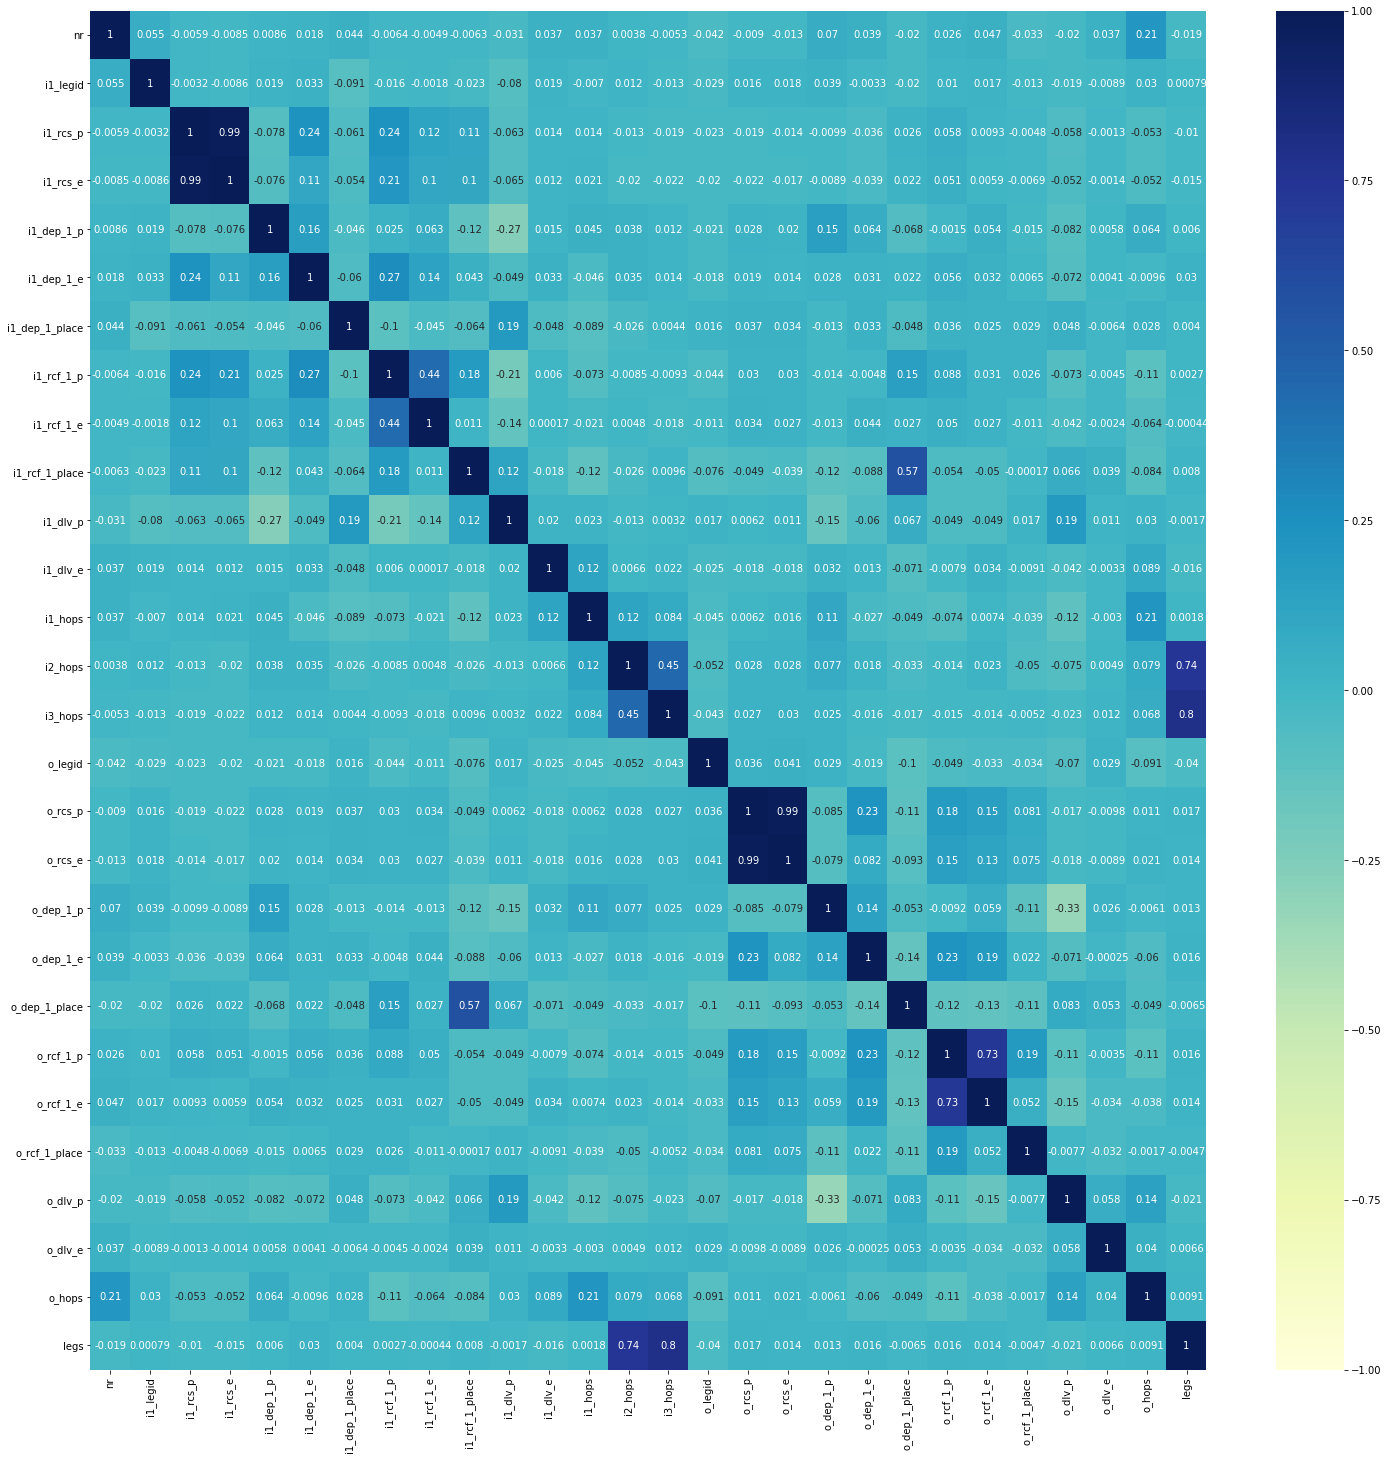

In [55]:
plt.figure(figsize=(25, 25))
sns.heatmap(cargo.corr(),annot=True,vmin=-1,cmap='YlGnBu')

# Split the dataset into train & test

In [56]:
cargo.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_hops,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0,5182,199,218,210,215,609,935,736,256,840,1539,1,1,0,10121,9919,7559,240,2865,256,1330,1265,411,780,434,1,2
1,1,6523,844,584,90,297,700,1935,1415,431,3780,5790,1,2,0,626,3030,3016,300,286,431,835,526,256,3870,445,1,2
2,2,5878,4380,4119,90,280,456,905,547,700,3780,321,1,0,0,12691,1433,642,240,969,700,1200,1280,349,550,1520,1,1
3,3,1275,759,169,240,777,173,340,577,349,335,535,2,0,0,12932,3963,3176,90,883,671,815,956,700,3780,159,1,1
4,4,8117,1597,1485,150,241,411,585,612,128,4230,1255,2,0,0,12805,152,179,180,131,166,230,167,128,4140,4797,2,1


In [57]:
cargo.columns

Index(['nr', 'i1_legid', 'i1_rcs_p', 'i1_rcs_e', 'i1_dep_1_p', 'i1_dep_1_e',
       'i1_dep_1_place', 'i1_rcf_1_p', 'i1_rcf_1_e', 'i1_rcf_1_place',
       'i1_dlv_p', 'i1_dlv_e', 'i1_hops', 'i2_hops', 'i3_hops', 'o_legid',
       'o_rcs_p', 'o_rcs_e', 'o_dep_1_p', 'o_dep_1_e', 'o_dep_1_place',
       'o_rcf_1_p', 'o_rcf_1_e', 'o_rcf_1_place', 'o_dlv_p', 'o_dlv_e',
       'o_hops', 'legs'],
      dtype='object')

In [58]:
from sklearn.preprocessing import StandardScaler
cargo[['i1_legid', 'i1_rcs_p', 'i1_rcs_e', 'i1_dep_1_p', 'i1_dep_1_e','i1_dep_1_place', 'i1_rcf_1_p', 'i1_rcf_1_e', 'i1_rcf_1_place','i1_dlv_p', 'i1_dlv_e', 'o_legid',
       'o_rcs_p', 'o_rcs_e', 'o_dep_1_p', 'o_dep_1_e', 'o_dep_1_place','o_rcf_1_p', 'o_rcf_1_e', 
       'o_rcf_1_place', 'o_dlv_p', 'o_dlv_e']] = StandardScaler().fit_transform(cargo[['i1_legid', 'i1_rcs_p', 'i1_rcs_e', 'i1_dep_1_p', 'i1_dep_1_e','i1_dep_1_place', 
                                                                                       'i1_rcf_1_p', 'i1_rcf_1_e', 'i1_rcf_1_place','i1_dlv_p', 'i1_dlv_e', 'o_legid','o_rcs_p', 
                                                                                       'o_rcs_e', 'o_dep_1_p', 'o_dep_1_e', 'o_dep_1_place','o_rcf_1_p', 
                                                                                       'o_rcf_1_e', 'o_rcf_1_place', 'o_dlv_p', 'o_dlv_e']])

In [59]:
cargo.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_hops,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops,legs
0,0,-0.499375,-0.427992,-0.315171,0.029656,-0.724729,0.452743,0.316317,0.091372,-0.886827,-1.675755,-0.127414,1,1,0,0.664768,1.475937,1.148058,0.208872,2.521576,-1.071507,1.075594,1.286167,-0.208811,-1.609331,-0.226344,1,2
1,1,-0.183592,-0.290238,-0.234781,-0.825740,-0.604970,0.843543,2.588721,0.980085,-0.149768,0.050905,0.633884,1,2,0,-1.591255,0.054611,0.185619,0.589519,-0.633297,-0.232828,-0.046380,-0.367322,-0.853710,0.171557,-0.225581,1,2
2,2,-0.335479,0.464950,0.541669,-0.825740,-0.629798,-0.204316,0.248144,-0.156002,0.983197,0.050905,-0.345542,1,0,0,1.275403,-0.274879,-0.317315,0.208872,0.202212,1.056341,0.780934,1.319729,-0.466771,-1.741889,-0.151026,1,1
3,3,-1.419408,-0.308392,-0.325934,0.243505,0.096058,-1.419661,-1.035764,-0.116736,-0.495133,-1.972341,-0.307217,2,0,0,1.332665,0.247106,0.219515,-0.742746,0.097009,0.917360,-0.091712,0.594789,0.993612,0.119686,-0.245416,1,1
4,4,0.191768,-0.129419,-0.036880,-0.398042,-0.686757,-0.397569,-0.479025,-0.070926,-1.425933,0.315190,-0.178275,2,0,0,1.302489,-0.539173,-0.415402,-0.171776,-0.822908,-1.502828,-1.417681,-1.170574,-1.386271,0.327168,0.076245,2,1


In [62]:
X = cargo.drop(['legs'], axis = 1)
X.head()

,nr,i1_legid,i1_rcs_p,i1_rcs_e,i1_dep_1_p,i1_dep_1_e,i1_dep_1_place,i1_rcf_1_p,i1_rcf_1_e,i1_rcf_1_place,i1_dlv_p,i1_dlv_e,i1_hops,i2_hops,i3_hops,o_legid,o_rcs_p,o_rcs_e,o_dep_1_p,o_dep_1_e,o_dep_1_place,o_rcf_1_p,o_rcf_1_e,o_rcf_1_place,o_dlv_p,o_dlv_e,o_hops
0,0,-0.499375,-0.427992,-0.315171,0.029656,-0.724729,0.452743,0.316317,0.091372,-0.886827,-1.675755,-0.127414,1,1,0,0.664768,1.475937,1.148058,0.208872,2.521576,-1.071507,1.075594,1.286167,-0.208811,-1.609331,-0.226344,1
1,1,-0.183592,-0.290238,-0.234781,-0.825740,-0.604970,0.843543,2.588721,0.980085,-0.149768,0.050905,0.633884,1,2,0,-1.591255,0.054611,0.185619,0.589519,-0.633297,-0.232828,-0.046380,-0.367322,-0.853710,0.171557,-0.225581,1
2,2,-0.335479,0.464950,0.541669,-0.825740,-0.629798,-0.204316,0.248144,-0.156002,0.983197,0.050905,-0.345542,1,0,0,1.275403,-0.274879,-0.317315,0.208872,0.202212,1.056341,0.780934,1.319729,-0.466771,-1.741889,-0.151026,1
3,3,-1.419408,-0.308392,-0.325934,0.243505,0.096058,-1.419661,-1.035764,-0.116736,-0.495133,-1.972341,-0.307217,2,0,0,1.332665,0.247106,0.219515,-0.742746,0.097009,0.917360,-0.091712,0.594789,0.993612,0.119686,-0.245416,1
4,4,0.191768,-0.129419,-0.036880,-0.398042,-0.686757,-0.397569,-0.479025,-0.070926,-1.425933,0.315190,-0.178275,2,0,0,1.302489,-0.539173,-0.415402,-0.171776,-0.822908,-1.502828,-1.417681,-1.170574,-1.386271,0.327168,0.076245,2


In [78]:
from sklearn import preprocessing
y = preprocessing.label_binarize(y, classes=[0, 1, 2, 3])

In [79]:
y = cargo['legs']
y.head()

0    2
1    2
2    1
3    1
4    1
Name: legs, dtype: int32

In [80]:
#Divide dataset into Training data and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

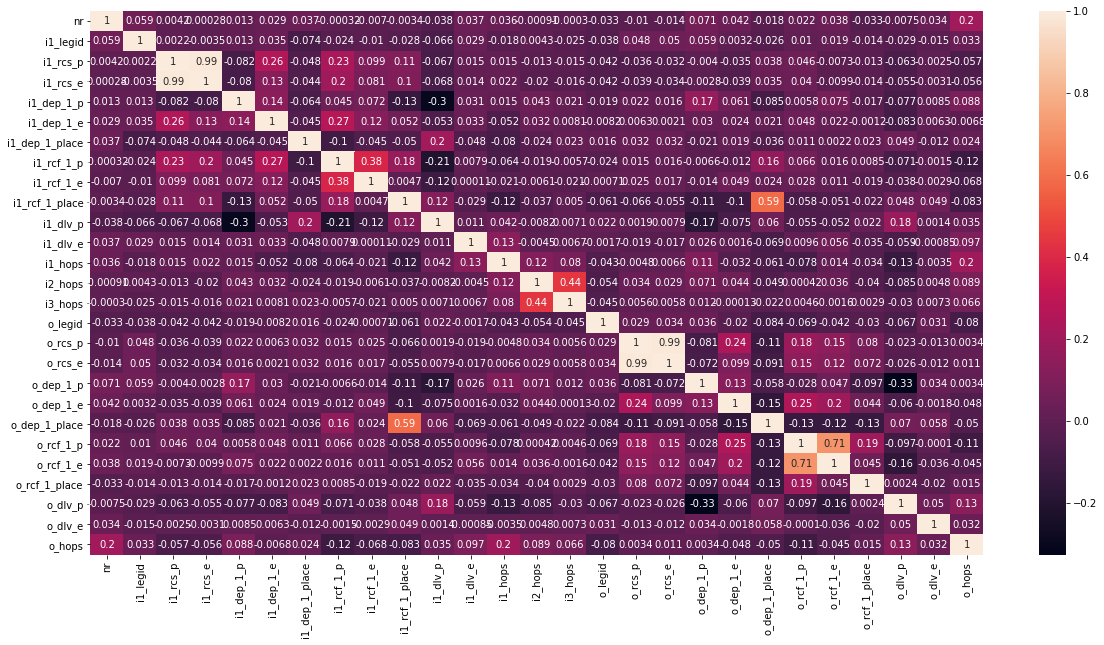

In [81]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

# Model Building

In [82]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   legs   No. Observations:                 2760
Model:                            GLM   Df Residuals:                     2732
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 25 Dec 2020   Deviance:                          nan
Time:                        22:02:45   Pearson chi2:                 2.11e+19
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            2.23e+17   5.38e+06   4.15e+10      0.000    2.23e+17    2.23e+17
nr              1.059e+12   1159.815   9.13e+08      0.000    1.06e+12    1.06e+12
i1_legid        1.545e+15   1.29e+06    1.2e+09      0.000    1.54e+15    1.54e+15
i1_rcs_p       -4.954e+16   2.11e+07  -2.34e+09      0.000   -4.95e+16   -4.95e+16
i1_rcs_e        5.192e+16   2.06e+07   2.52e+09      0.000    5.19e+16    5.19e+16
i1_dep_1_p     -4.623e+15   1.59e+06   -2.9e+09      0.000   -4.62e+15   -4.62e+15
i1_dep_1_e      4.566e+15   3.25e+06    1.4e+09      0.000    4.57e+15    4.57e+15
i1_dep_1_place  1.823e+15   1.33e+06   1.37e+09      0.000    1.82e+15    1.82e+15
i1_rcf_1_p       3.18e+15   1.48e+06   2.14e+09      0.000    3.18e+15    3.18e+15
i1_rcf_1_e      1.011e+15   1.26e+06   8.01e+08      0.000    1.01e+15    1.01e+15
i1_rcf_1_place  -5.72e+15   1.63e+06   -3.5e+09      0.000   -5.72e+15   -5.72e+15
i1_dlv_p         2.61e+15   1.44e+06   1.81e+09      0.000    2.61e+15    2.61e+15
i1_dlv_e       -2.314e+15   1.32e+06  -1.75e+09      0.000   -2.31e+15   -2.31e+15
i1_hops        -6.317e+16   2.92e+06  -2.16e+10      0.000   -6.32e+16   -6.32e+16
i2_hops         2.496e+17   1.99e+06   1.25e+11      0.000     2.5e+17     2.5e+17
i3_hops         3.203e+17   2.13e+06   1.51e+11      0.000     3.2e+17     3.2e+17
o_legid         2.255e+15    1.3e+06   1.73e+09      0.000    2.25e+15    2.25e+15
o_rcs_p        -1.752e+15   1.77e+07  -9.88e+07      0.000   -1.75e+15   -1.75e+15
o_rcs_e        -5.131e+15   1.73e+07  -2.97e+08      0.000   -5.13e+15   -5.13e+15
o_dep_1_p       -6.49e+15    1.5e+06  -4.33e+09      0.000   -6.49e+15   -6.49e+15
o_dep_1_e       5.457e+15   3.05e+06   1.79e+09      0.000    5.46e+15    5.46e+15
o_dep_1_place   3.774e+15   1.63e+06   2.32e+09      0.000    3.77e+15    3.77e+15
o_rcf_1_p       4.268e+15   1.94e+06   2.21e+09      0.000    4.27e+15    4.27e+15
o_rcf_1_e       2.903e+15   1.85e+06   1.57e+09      0.000     2.9e+15     2.9e+15
o_rcf_1_place   5.209e+15   1.34e+06   3.89e+09      0.000    5.21e+15    5.21e+15
o_dlv_p         7.148e+15   1.44e+06   4.96e+09      0.000    7.15e+15    7.15e+15
o_dlv_e         -1.65e+15   1.13e+06  -1.47e+09      0.000   -1.65e+15   -1.65e+15
o_hops          -3.27e+16    2.7e+06  -1.21e+10      0.000   -3.27e+16   -3.27e+16
==================================================================================
"""

# Polynomial Regression

In [90]:
len(X_train)

2760

In [95]:
from sklearn.preprocessing import PolynomialFeatures
# fit multiple polynomial features
degrees = [1, 2, 3]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features
    model = make_pipeline(PolynomialFeatures(degree), LogisticRegression())
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)

In [97]:
# compare r2 for train and test sets (for all polynomial fits)
print("R-squared values: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(sklearn.metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(sklearn.metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

R-squared values: 

Polynomial degree 1: train score=1.0, test score=1.0
Polynomial degree 2: train score=1.0, test score=0.99
Polynomial degree 3: train score=0.99, test score=0.99


# K-Fold CV

In [98]:
# k-fold CV (using all the variables)
lm = LogisticRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores 

array([1.        , 0.99460787, 1.        , 1.        , 0.997326  ])

In [100]:
# can tune other metrics, such as MSE
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
scores

array([-0.        , -0.00362319, -0.        , -0.        , -0.00181159])

# Hyperparameter Tuning Using Grid Search Cross-Validation

In [101]:
len(X_train.columns)

27

In [103]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LogisticRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:  2.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LogisticRegression(C=1.0,
                                                        class_weight=None,
                                                        dual=False,
                                                        fit_intercept=True,
                                                        intercept_scaling=1,
                                                        l1_ratio=None,
                                                        max_iter=100,
                                                        multi_class='auto',
                                                        n_jobs=None,
                                                        penalty='l2',
                                                        random_state=None,
                                                        solver='lbfgs',
                                         

In [104]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.715001,0.934912,0.001999,1.556857e-06,1,{'n_features_to_select': 1},0.452779,0.508070,0.520049,0.509381,0.497837,0.497623,0.023500,13,0.524332,0.511268,0.508245,0.511001,0.501679,0.511305,0.007373
1,2.578986,0.923903,0.001201,3.983975e-04,2,{'n_features_to_select': 2},1.000000,1.000000,1.000000,0.997319,1.000000,0.999464,0.001072,1,0.999333,0.999327,0.999325,1.000000,0.999321,0.999461,0.000269
2,2.655749,0.940702,0.001402,4.886770e-04,3,{'n_features_to_select': 3},1.000000,1.000000,1.000000,0.997319,1.000000,0.999464,0.001072,1,0.999333,0.999327,0.999325,1.000000,0.999321,0.999461,0.000269
3,2.589594,0.906764,0.001199,3.984417e-04,4,{'n_features_to_select': 4},1.000000,1.000000,1.000000,0.997319,1.000000,0.999464,0.001072,1,0.999333,0.999327,0.999325,1.000000,0.999321,0.999461,0.000269
4,2.527964,0.870495,0.001804,3.934863e-04,5,{'n_features_to_select': 5},1.000000,1.000000,1.000000,0.997319,1.000000,0.999464,0.001072,1,0.999333,0.999327,0.999325,1.000000,0.999321,0.999461,0.000269
5,2.529937,0.830639,0.001600,4.930741e-04,6,{'n_features_to_select': 6},1.000000,1.000000,1.000000,0.997319,1.000000,0.999464,0.001072,1,0.999333,0.999327,0.999325,1.000000,0.999321,0.999461,0.000269
6,2.371439,0.882440,0.001940,5.349967e-04,7,{'n_features_to_select': 7},1.000000,1.000000,1.000000,0.997319,1.000000,0.999464,0.001072,1,0.999333,1.000000,1.000000,1.000000,0.999321,0.999731,0.000330
7,2.341177,0.636065,0.001400,4.862986e-04,8,{'n_features_to_select': 8},1.000000,1.000000,1.000000,0.997319,1.000000,0.999464,0.001072,1,0.999333,1.000000,1.000000,1.000000,1.000000,0.999867,0.000267
8,2.310569,0.760563,0.001403,4.886179e-04,9,{'n_features_to_select': 9},1.000000,0.997297,1.000000,0.997319,1.000000,0.998923,0.001319,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,2.134007,0.802263,0.001746,1.138583e-03,10,{'n_features_to_select': 10},1.000000,0.997297,1.000000,0.997319,1.000000,0.998923,0.001319,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


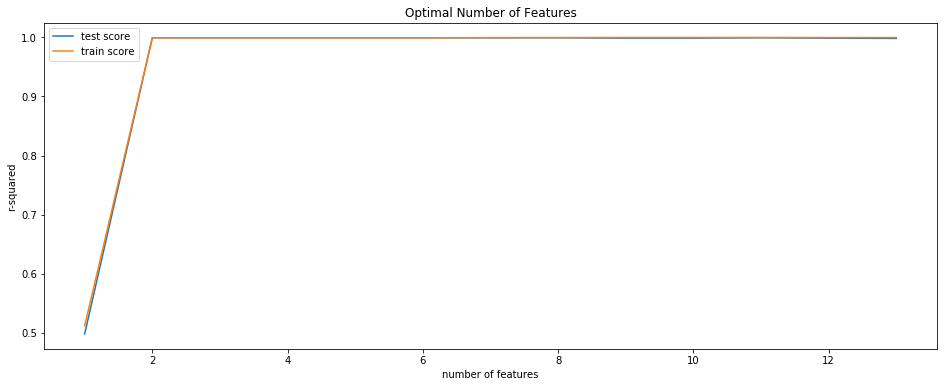

In [105]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# Now we can choose the optimal value of number of features and build a final model.

In [106]:
# final model
n_features_optimal = 10

lm = LogisticRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

1.0
